<font size = +4>ARIMA and SARIMA</font>

<font size=+1>Import the libraries needed for this project</font>

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
from sklearn import datasets
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<font size=+1>Initiate the dates needed to sort out our data.</font>

In [2]:
today = date.today()
day = today.strftime('%Y-%m-%d')
end_date = day
day2 = today - timedelta(days = 365)
start_date = day2.strftime('%Y-%m-%d')
print(f"Today {today}.\nStart Date {start_date}.\nEnd Date {end_date}.")

Today 2022-12-30.
Start Date 2021-12-30.
End Date 2022-12-30.


**Download Twitter data for the project.**

In [3]:
data = yf.download('TWTR-USD', start = start_date, end = end_date, progress = False)

**Display the first 5 rows of the data**

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-30,42.779999,46.665001,42.685001,43.334999,43.334999,2016
2021-12-31,43.334999,44.665001,43.275002,43.330002,43.330002,544
2022-01-01,43.330002,43.419998,43.130001,43.134998,43.134998,11
2022-01-02,43.134998,43.419998,43.130001,43.384998,43.384998,98
2022-01-03,43.384998,43.695000,42.580002,42.880001,42.880001,427


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 2021-12-30 to 2022-11-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       315 non-null    float64
 1   High       315 non-null    float64
 2   Low        315 non-null    float64
 3   Close      315 non-null    float64
 4   Adj Close  315 non-null    float64
 5   Volume     315 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


<font size=+1>Statistical analysis of our data</font>

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,315.000000,315.000000,315.000000,315.000000,315.000000,3.150000e+02
mean,41.353412,42.089989,40.603283,41.376189,41.376189,1.133252e+05
std,5.303398,5.413493,5.264295,5.323200,5.323200,3.985168e+05
min,32.180000,33.195000,30.000000,32.180000,32.180000,0.000000e+00
25%,37.867500,38.527500,37.087502,37.862499,37.862499,4.355000e+02
50%,39.980000,40.599998,39.419998,39.980000,39.980000,7.058000e+03
75%,44.250000,44.907499,43.907499,44.304998,44.304998,5.302750e+04
max,53.980000,54.995956,53.020000,53.980000,53.980000,4.682460e+06


<font size=+1>Create a Data column and copy the index values into it</font>

In [7]:
data['Date'] = data.index.copy()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-12-30,42.779999,46.665001,42.685001,43.334999,43.334999,2016,2021-12-30
2021-12-31,43.334999,44.665001,43.275002,43.330002,43.330002,544,2021-12-31
2022-01-01,43.330002,43.419998,43.130001,43.134998,43.134998,11,2022-01-01
2022-01-02,43.134998,43.419998,43.130001,43.384998,43.384998,98,2022-01-02
2022-01-03,43.384998,43.695000,42.580002,42.880001,42.880001,427,2022-01-03


Copy the necessary columns(Date, Close) needed for the project

In [8]:
ar_data = data[['Date','Close']]
ar_data.reset_index(drop = True, inplace = True)
ar_data.head()

,Date,Close
0,2021-12-30,43.334999
1,2021-12-31,43.330002
2,2022-01-01,43.134998
3,2022-01-02,43.384998
4,2022-01-03,42.880001


In [9]:
log_data = ar_data[['Date','Close']]
log_data['Close'] = np.log(log_data['Close']).copy()
log_data

,Date,Close
0,2021-12-30,3.768961
1,2021-12-31,3.768845
2,2022-01-01,3.764335
3,2022-01-02,3.770114
4,2022-01-03,3.758406
...,...,...
310,2022-11-05,3.912158
311,2022-11-06,3.912158
312,2022-11-07,3.912158
313,2022-11-08,3.912158


In [10]:
#Divide the data set into training sets and test sets
#Variable MSK is instantiated with boolean value True for values lesser than ar_data.index < len(ar_data)-30. 
msk = (log_data.index < len(log_data)-30)
#train data
data_train = log_data[msk].copy()
#test data
data_test = log_data[~msk].copy()

Import Matplot for ploting graphs

In [11]:
import matplotlib.pyplot as plt

Plot close against date to better understand the seasonality of our data.

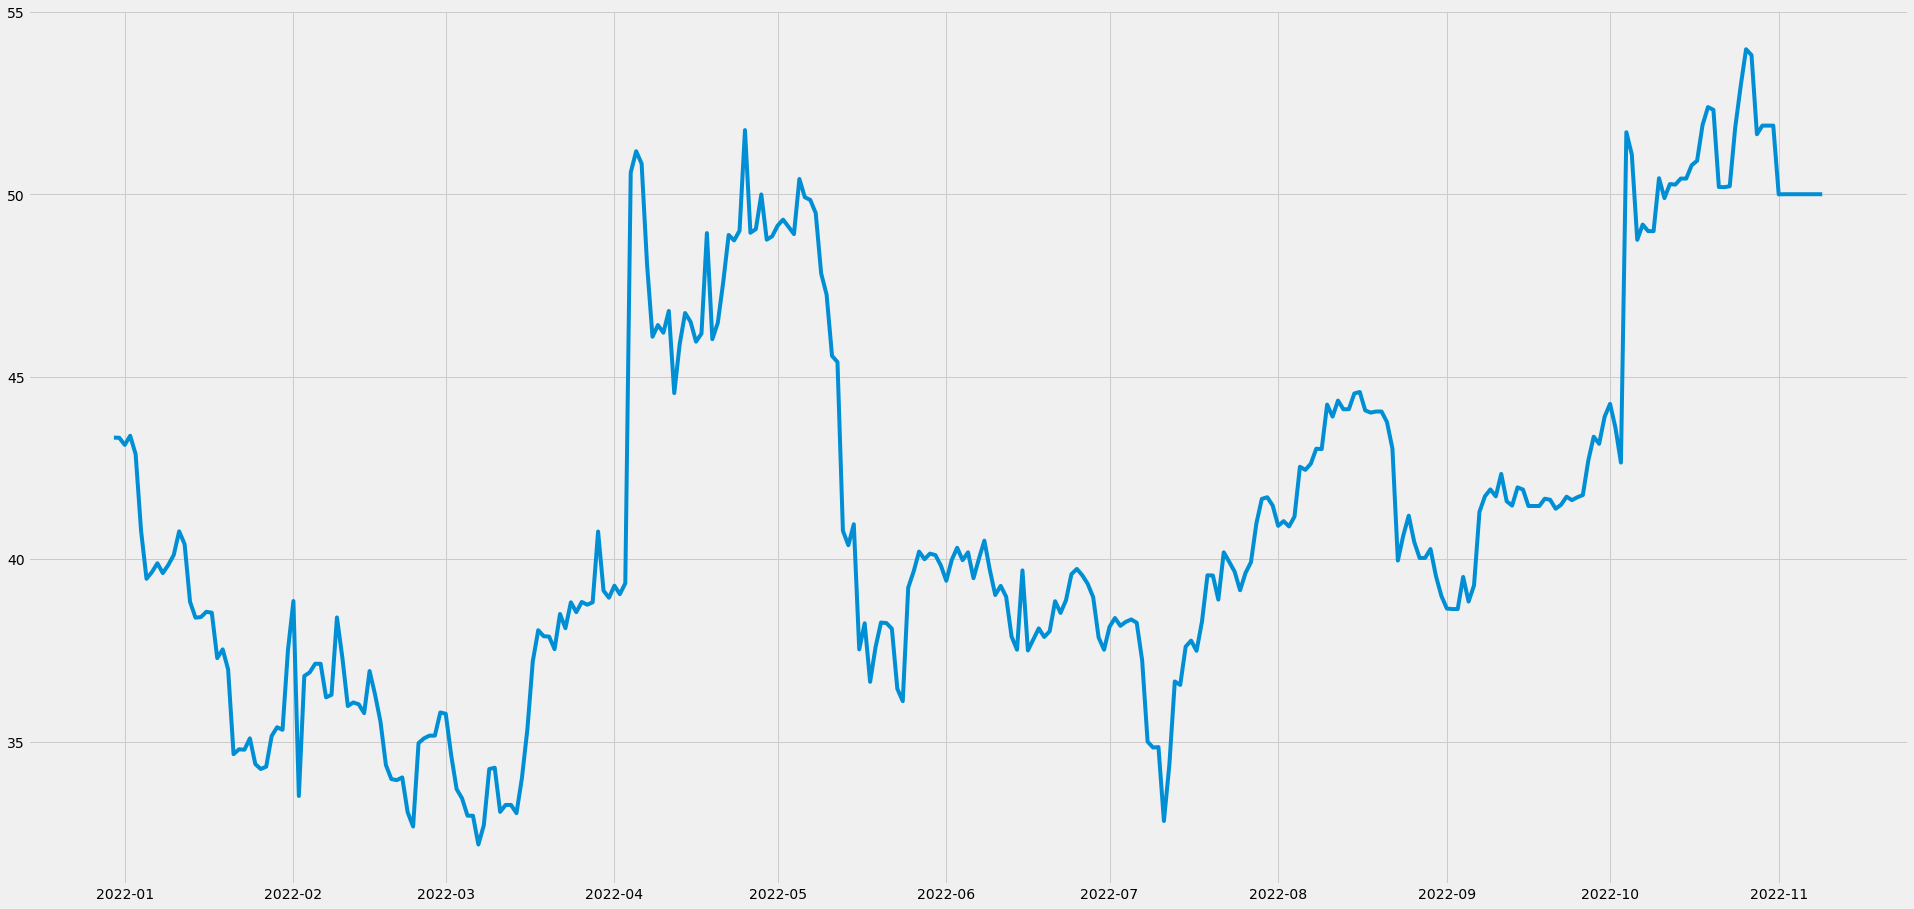

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30, 15))
plt.plot(ar_data.Date, ar_data['Close'])

<font size=+1>**Decompose our data into trend, seasonal and residual, this also will shine more light into the stationarity of our Data**</font>

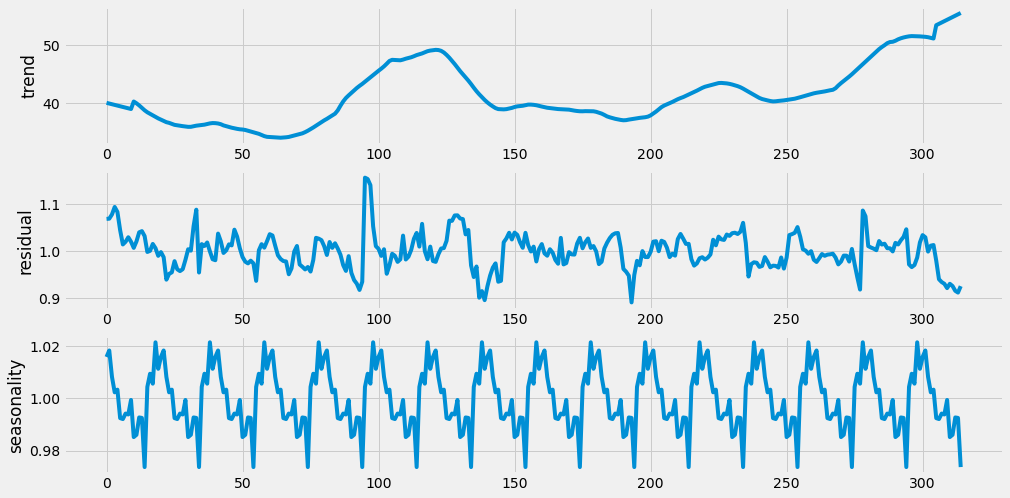

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ar_data['Close'], model = 'multiplicative', filt = None, period=20, two_sided = True, extrapolate_trend = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1,ylabel = "trend")
result.seasonal.plot(ax=ax3,ylabel = "seasonality")
result.resid.plot(ax=ax2,ylabel = "residual")
plt.show()

<font size=+1>First order differencing</font>

In [14]:
data_train_diff = data_train['Close'].diff().dropna()

Discovering if the data becomes stationary after the first differencing or the second differencing, including the log values of the data.

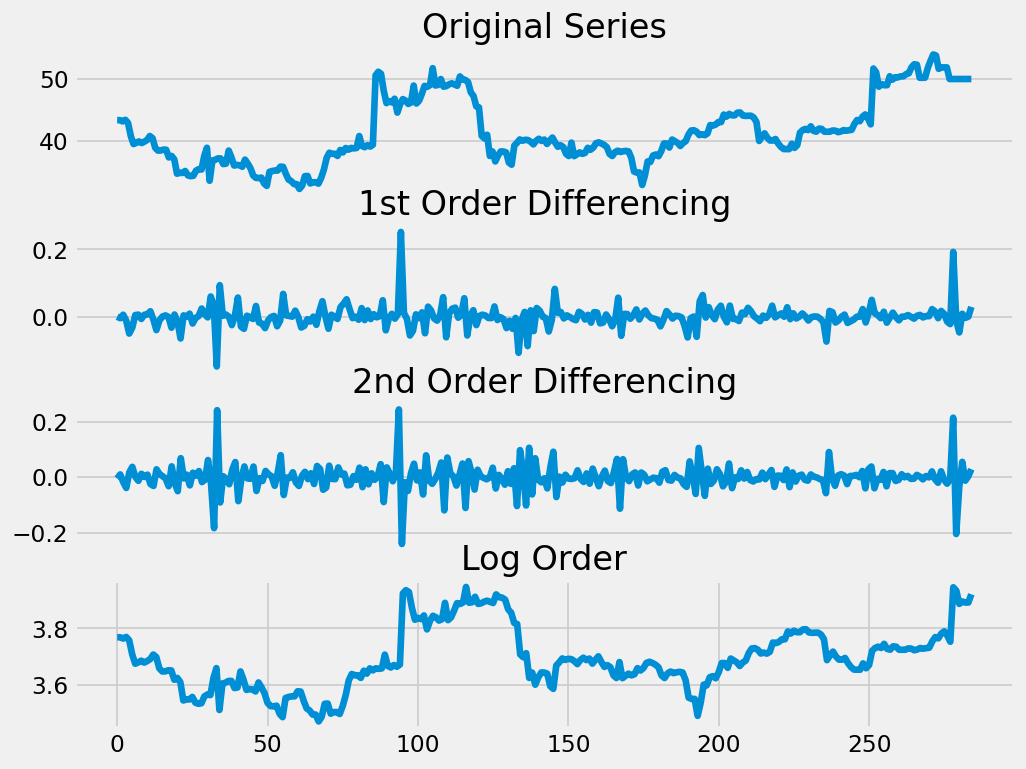

In [15]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(ar_data['Close']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_train_diff); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_train_diff.diff()); ax3.set_title('2nd Order Differencing'); ax3.axes.xaxis.set_visible(False)
#log differencing
ax4.plot(data_train['Close']); ax4.set_title('Log Order')
plt.show()

Dividing our data into training sets and test sets.

Import the libraries needed for plotting the ACF and PACF graphs

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Plotting the first order differencing for both ACF and PACF

<function matplotlib.pyplot.show(close=None, block=None)>

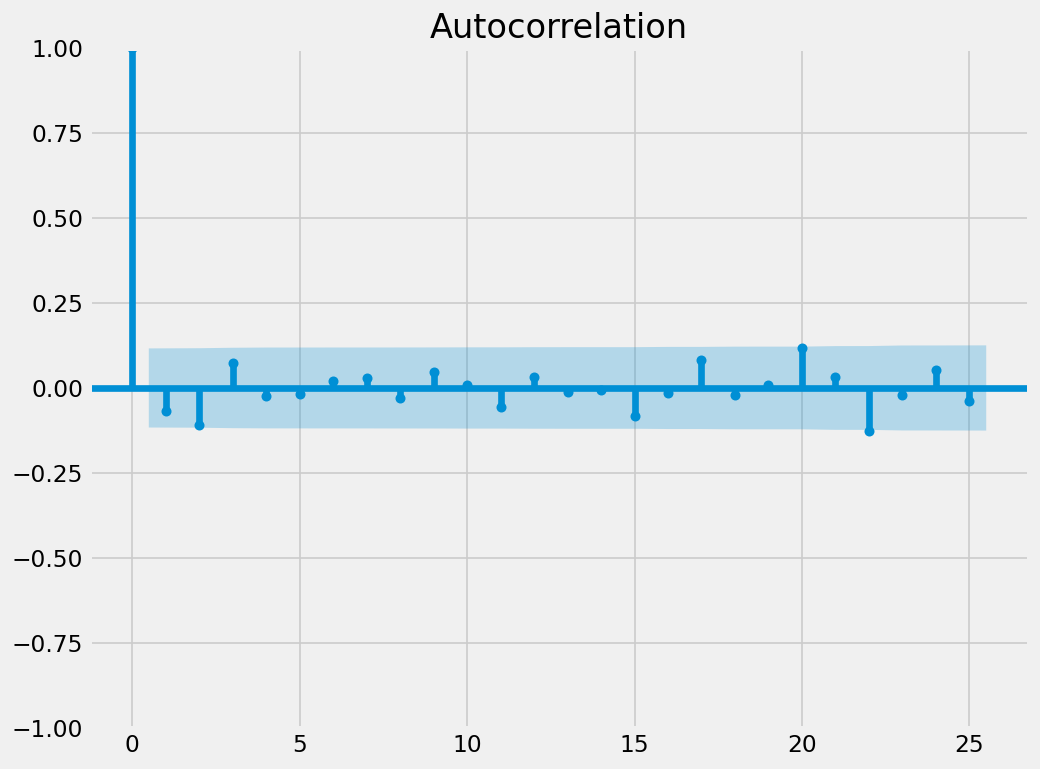

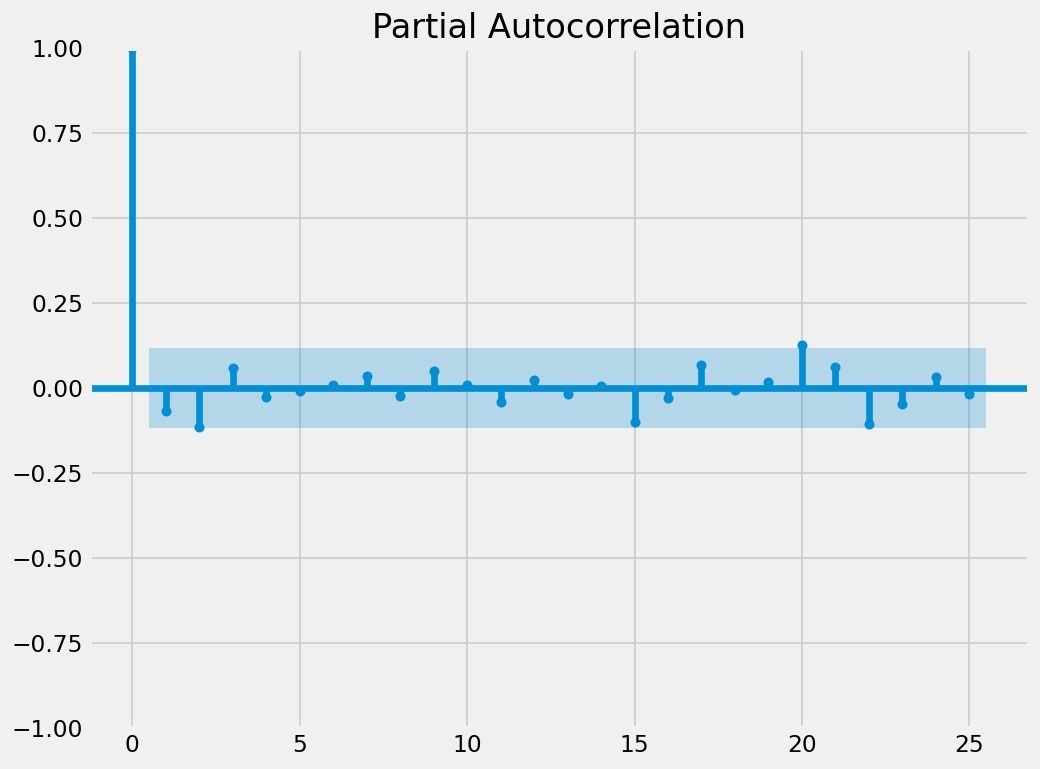

In [17]:
plot_acf(data_train_diff)
plot_pacf(data_train_diff)
plt.show

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

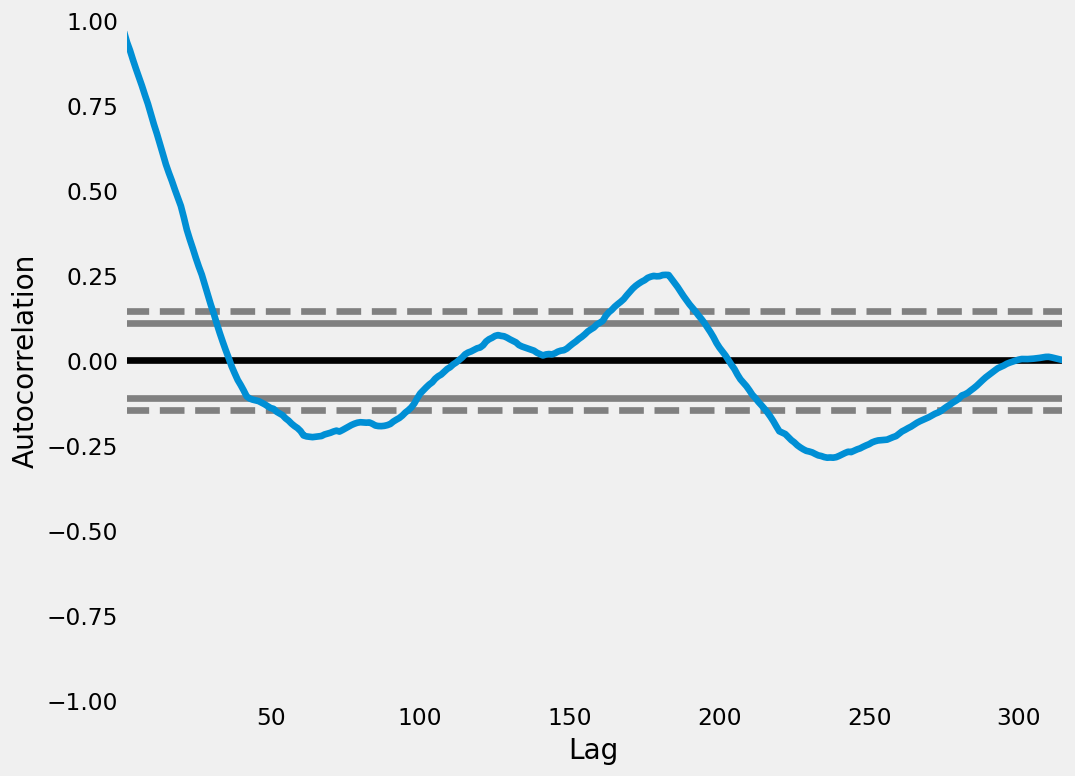

In [18]:
pd.plotting.autocorrelation_plot(log_data['Close'])

After discovering the orders for the arima model, a variable is initiated with the derived values

In [19]:
p = 2
d = 1
q = 0

Import the library for Adfuller test, this tells if the data is stationary or not. A value of less than 5% (0.05) indicates that the data is stationary 

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
from pmdarima.arima import ADFTest

In [22]:
ad_fuller = ADFTest(alpha = 0.05)
ad_fuller.should_diff(data_train_diff)

(0.01, False)

In [23]:
ar_adtest = adfuller(data_train_diff)
print(f'p-value: {ar_adtest[1]}')

p-value: 1.47416239474206e-25


Import the ARIMA model for stationary model prediction.

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
#Initialize a variable with the ARIMA model, using the P,D,Q as orders
model = ARIMA(data_train['Close'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  285
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 576.182
Date:                Fri, 30 Dec 2022   AIC                          -1146.365
Time:                        22:50:53   BIC                          -1135.418
Sample:                             0   HQIC                         -1141.976
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0753      0.053     -1.433      0.152      -0.178       0.028
ar.L2         -0.1138      0.065     -1.742      0.081      -0.242       0.014
sigma2         0.0010   2.76e-05     36.665      0.0

The following graph shows the stationality of the data after applying the ARIMA model to it. The density graph indicaates a stationary mean

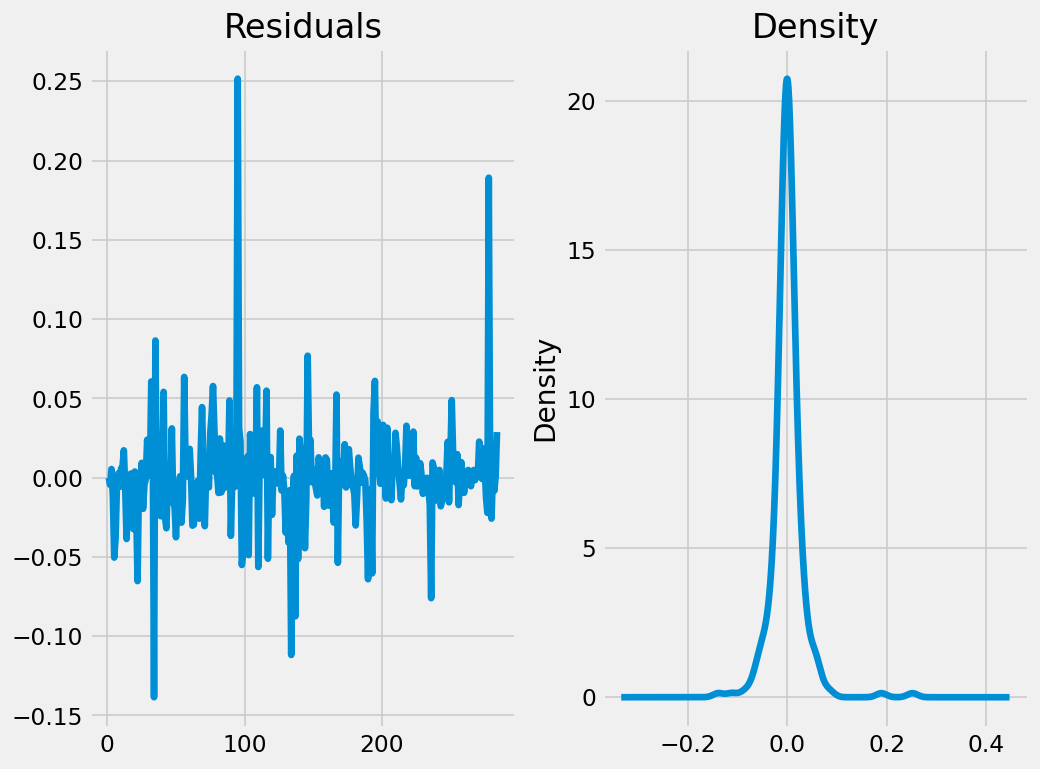

In [26]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

Using the defined model, forecast the value of size ar_test

In [27]:
manual_forecast = model_fit.forecast(len(data_test))

Plot a graph that compares the previous values with the newly predicted values

In [28]:
log_data['forecast_manual'] = [None]*len(ar_train) + list(manual_forecast)
log_data[['Close','forecast_manual']].plot()

NameError: name 'ar_train' is not defined

Importing and using the auto_arimal model to predict the values of the order

In [ ]:
import pmdarima as pm

In [ ]:
auto_arima = pm.auto_arima(data_train['Close'], stepwise = False, seasonal = False)
auto_arima

The order values isn't different from the orders that were initially gotten so there isnt any need to go any further with this.

Since our data is seasonal, we can attempt to make prediction using the SARIMA model to get the seasonal predictions.

In [ ]:
import statsmodels.api as sm
model2 = sm.tsa.statespace.SARIMAX(data_train['Close'], order = (p, d, q), seasonal_order = (p, d, q, 12)).fit()
print(model2.summary())

In [ ]:
sm_predict = model2.forecast(len(data_test))

In [ ]:
log_data['seasonal_predict'] = [None]*len(ar_train) + list(sm_predict)

In [ ]:
log_data[['Close', 'forecast_manual', 'seasonal_predict']].plot()

<font size=+2>Comparing the predicted data with the ar_test data inorder to find the error percentage</font>

Download the library needed for finding the mean mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(data_test['Close'], manual_forecast)
mape = mean_absolute_percentage_error(data_test['Close'], manual_forecast)
rmse = np.sqrt(mean_squared_error(data_test['Close'], manual_forecast))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

In [ ]:
mae1 = mean_absolute_error(data_test['Close'], sm_predict)
mape1 = mean_absolute_percentage_error(data_test['Close'], sm_predict)
rmse1 = np.sqrt(mean_squared_error(data_test['Close'],  sm_predict))

print(f'mae - manual: {mae1}')
print(f'mape - manual: {mape1}')
print(f'rmse - manual: {rmse1}')